### Regression, Observations, and Interventions

This chapter builds a link between associations, interventions, and regression models. 

<b>Linear regression</b> is a basic data-fitting algorithm that can be used to predict the expected value of a dependent (target) variable, Y, given values of some predictor(s), X. Formally, this is:
- Yhat<sub>X = x</sub> = E[Y | X = x].

An important feature of linear regression is that it allows us to easily quantify the strength of the relationship between predictors and the target variable by computing regression coefficients. Regression coefficients can be thought of as the amount of change in the <i>predicted</i> output variable relative to a unit change in the input variable. 

As an example, a model with one predictor, x. First, we define the data-generating process. We'll make this process follow the linear regression formula (Yhat<sub>i</sub> = a + bx<sub>i</sub>) and assign arbitrary values to the (true) parameters a* and b*. We will also add noise to the model and mark it as e (this will be normally distributed with zero mean and a standard deviation of 1). Additionally we will scale e by 0.5. So the data-generating formula becomes: 
- yhat<sub>i</sub> = 1.12 + 0.93x<sub>i</sub> + 0.5e<sub>i</sub>

In [ ]:
%pip install statsmodels matplotlib graphviz

In [1]:
import numpy as np 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import graphviz
plt.style.use('fivethirtyeight')


In [2]:
import os
import sys

# Add the Graphviz bin directory to the PATH (adjust if your path is different)
graphviz_path = r"C:\Users\nrad9\Downloads\Graphviz\Graphviz\bin"
os.environ["PATH"] += os.pathsep + graphviz_path

# Optionally, confirm it's in the PATH
print("Graphviz path added to PATH:", graphviz_path)

Graphviz path added to PATH: C:\Users\nrad9\Downloads\Graphviz\Graphviz\bin


In [3]:
# Set seed for reproducibility + # samples to generate
np.random.seed(42)
N_SAMPLES = 5_000

# Define model parameters
alpha = 1.12
beta = 0.93
epsilon = np.random.randn(N_SAMPLES)

# Use model formula to generate the data
X = np.random.randn(N_SAMPLES)
y = alpha + (beta * X) + (0.5 * epsilon)

# Statsmodels requires us to add a constant feature to perform the intercept computations
X = sm.add_constant(X)

# 5 rows of x
print(X[:5, :])

[[ 1.         -0.42375968]
 [ 1.         -0.45341411]
 [ 1.         -1.79564317]
 [ 1.         -0.33009019]
 [ 1.          0.73282908]]


In [4]:
# Fit regression model
model = sm.OLS(y, X)
fitted_model = model.fit()
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.774e+04
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:45:09   Log-Likelihood:                -3610.8
No. Observations:                5000   AIC:                             7226.
Df Residuals:                    4998   BIC:                             7239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1228      0.007    159.324      0.0

The coefficient marked <i>const</i> is a, the estimate of the true a* parameter, while x1 is b, the estimate of b*. They are slightly different from their true counterparts because we made our model noisy by adding the e term. Both coefficents are associated with p-values below 0.001, which indicates they are <b>statistically significant</b> at the customary p < 0.05 level.

<b>P-values and statistical significance</b>: Broadly speaking, the p-value is a statistical device meant to help distinguish between the signal and the noise in statistical comparison/summaries. The p-value is the probability of observing data at least as extreme as we observed, given that the null hypothesis is true. 

The <b>null hypothesis</b> usually states that there is <i>no effect or no difference</i> between two or more objects that we compare. For linear regression, we test two types of null hypotheses:
- Null hypotheses for coefficients (including the intercept). The null hypothesis for a given coefficient states that this coefficient is not significantly different from zero. 
- A null hypothesis for the entire model. For this it states that the entire model is not significantly different from the null model (for simple regression, this is an intercept-only model).

The lower the p-value, the <i>less likely</i> the null hypothesis is, i.e. the more likely we are to agree that it should be rejected. 

In [5]:
# Generate predictions
y_pred = fitted_model.predict(X)

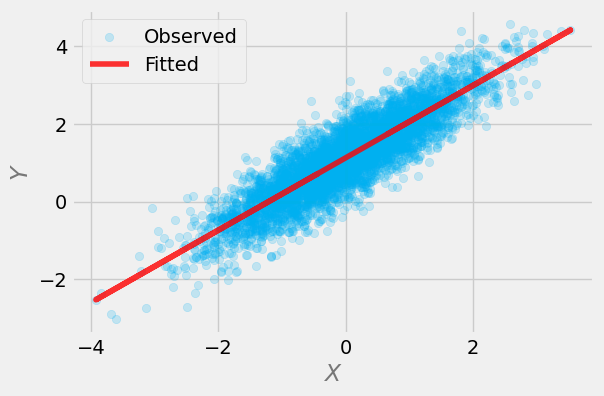

In [6]:
# Plot
COLORS = [
    '#00B0F0',
    '#FF0000'
]

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 1], y, color=COLORS[0], label='Observed', alpha=.2)
plt.plot(X[:, 1], y_pred, color=COLORS[1], label='Fitted', alpha=.8)
plt.xlabel('$X$', alpha=.5)
plt.ylabel('$Y$', alpha=.5)
legend = plt.legend()

# Set opacity for the legend
#[l.set_alpha(.8) for l in legend.legendHandles]

plt.show()

Each blue dot above represents a single observation, while the red line represents the best-fit model found by the linear regression algorithm. 

Regression is a purely statistical <i>rung 1</i> model and we can use it to quantify the association between X and Y (and Y and X). Regression does not say anything about the data's causal structure. There might be not causal link between two variables at all, but we can still find a relationship between them using a regression model.

Let's show this by regressing X on Y. 

In [7]:
# Let's remove the constant (now X becomes our target variable) 
x_rev = X[:, 1]

# Let's add constant (now Y becomes our predictor)
Y_rev = sm.add_constant(y)

# Instantiate the model and fit it
model_rev = sm.OLS(x_rev, Y_rev)
fitted_model_rev = model_rev.fit()

# Print results summary
print(fitted_model_rev.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                 1.774e+04
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:45:19   Log-Likelihood:                -3358.1
No. Observations:                5000   AIC:                             6720.
Df Residuals:                    4998   BIC:                             6733.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9451      0.010    -97.388      0.0

The coefficients have changed. The intercept is now negative (since now it's the point where the line crosses the X axis). Plotting this further illustrates the point:

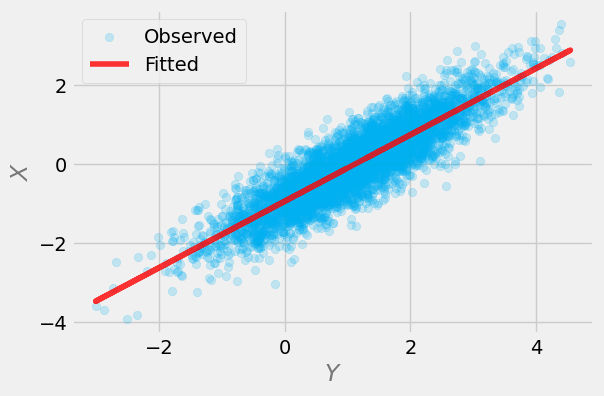

In [8]:
# Generate predictions
x_pred_rev = fitted_model_rev.predict(Y_rev)

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(Y_rev[:, 1], x_rev, color=COLORS[0], label='Observed', alpha=.2)
plt.plot(Y_rev[:, 1], x_pred_rev, color=COLORS[1], label='Fitted', alpha=.8)
plt.xlabel('$Y$', alpha=.5)
plt.ylabel('$X$', alpha=.5)
legend = plt.legend()

plt.show()

So, the regression model itself cannot help us understand which variable is the cause and which is the effect. We need external knowledge to determine this. 

Causal attributions become even more complicated in multiple regression, where each additional predictor can influence the relationship between variables in the model. E.g., the learned coefficient for X may be 0.63, but after adding variable Z to the model, the coefficient for X changes to -2.34. If the coefficient has changed, what is the true effect here?

<u>Should we always control for all available covariates?</u>: Multiple regression allows us to perform statistical control - a procedure to remove <i>unwanted</i> influence from certain variables in the model. E.g.: we are studying the predictors of dyslexia, and we are interested to find out whether parents smoking influences the risk of dsylexia in their children. In the model, we might want to control for parental education. Parental education might affect how much attention parents devote to their children's reading and writing skills. At the same time, education level might decrease the probability of smoking, potentially leading to confounding. But do we know whether it actually does lead to confounding? 
- Sometimes there is previous research to refer to
- In other cases, we rely on intuition or knowledge about the world

In many cases, we are left without a clear answer. This led to the development of heuristics guiding the choice of variables that should be included as statistical controls:
- If you're not sure about a variable, don't use it as a control
- Use conceptually meaningful control variables
- Conduct comparative tests of relationships between the independent variables and control variables
- Run results with and without the control variables and contrast the findings

Recommendations (1) and (3) discourage adding variables to the model. But not including a variable might also lead to confounding. This is because there are various patterns of <b>independence structure</b> possible between any three variables. Consider the SCM below:

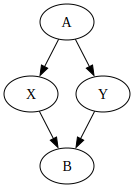

In [9]:
# Create a directed graph
g_1 = graphviz.Digraph(format='png')

# Add nodes
nodes_1 = ['A', 'X', 'B', 'Y']
[g_1.node(n) for n in nodes_1]

g_1.edges(['AX', 'XB', 'AY', 'YB'])
g_1

Above, we can see that X and Y are <i>causally</i> independent. There's no arrow between them, nor a directed path that connects them indirectly. Let's fit 4 models and analyse which variables, when controlled for, lead to spurious relationships between X and Y:
1. Start with a simple model that regresses Y on X.
2. Add A to this model.
3. Then, fit a model without A, but with B.
4. Build a model with all 4 variables.

In [10]:
# Define the SCM. Coefficients for scaling are arbitrarily chosen
a = np.random.randn(N_SAMPLES)
x = 2 * a + 0.5 * np.random.randn(N_SAMPLES)
y = 2 * a + 0.5 * np.random.randn(N_SAMPLES)
b = 1.5 * x + 0.75 * y

# Define 4 model variants and fit models iteratively
variants = [
    [x],
    [x, a],
    [x, b],
    [x, a, b]
]

results = []
for variant in variants:
    X = sm.add_constant(np.stack(variant).T)
    model = sm.OLS(y, X)
    fitted_model = model.fit()

    results.append((fitted_model.params, fitted_model.pvalues))
    
    print(f'Params: {fitted_model.params.round(3)}')
    print(f'p-vals: {fitted_model.pvalues.round(3)}')
    print(f'Signif: {fitted_model.pvalues <= .05}\n')

Params: [-0.016  0.94 ]
p-vals: [0.116 0.   ]
Signif: [False  True]

Params: [-0.009 -0.035  2.08 ]
p-vals: [0.196 0.011 0.   ]
Signif: [False  True  True]

Params: [ 0.    -2.     1.333]
p-vals: [0.047 0.    0.   ]
Signif: [ True  True  True]

Params: [ 0.    -2.     0.     1.333]
p-vals: [0.912 0.    0.    0.   ]
Signif: [False  True  True  True]



The first index value in each list above is for the intercept, so ignore it. Params are the coefficients for each variable respectively (i.e. top row params are -0.016 for the intercept and 0.94 for X). Corresponding p-value for X is significant. This is obviously incorrect!  
The only model that recognised the causal independence of X and Y is the second model (Y ~ X + A). All other statistical control schemes led to invalid results, including the model that does not control for any additional variables. 

Why did controlling for A work but the others didn't?:
1. A is a confounder between X and Y and we need to control for it in order to remove the confounding. 
2. X, Y, and B form a pattern called a <b>collider</b> or <b>immorality</b>. This pattern enables the flow of information between the parent variables (X and Y) when we control for the child variable (B in this example). This is the opposite of what happened when we control for A.
3. Not controlling for any variables leads to the same result in terms of the significance of X as controlling for A and B. This is because the effects of controlling for A and controlling for B are exactly the same from a <i>structural point of view</i> and they cancel each other out.

<u>To control or not to control</u>: No one-size-fits-all solution, but understanding causality lets you make better decisions. It gives you new eyes that allow you to see what's invisible from the perspective of rung 1 (association, correlation).

#### Regression and structural models

SCMs are a tool for encoding causal models. They consist of a set of variables and a set of functions defining the relationships between these variables. They can be represented as graphs, with nodes representing variables and directed edges representing functions. Lastly, SCMs can produce interventional and counterfactual distributions. 

Linear regression is a model that allows us to quantify the (relative) strength of a (linear in parameter) relationship between two or more variables. There is no notion of causal directionality in linear regression; we don't know which direction (if any) is the <i>causally correct</i> one. This condition is known as <i><u>observational equivalent</u><i>. Linear regression can be used to estimate causal effects, given that we know the underlying causal structure (which allows us to choose which variables we should control for) and that the underlying system is linear in terms of parameters. Linear models can be a useful microscope for causal analysis.

Let's build one more SCM that will be linear in terms of parameters but non-linear in terms of data and estimate its coefficients with linear regression:

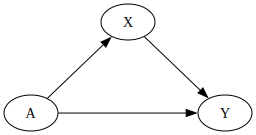

In [11]:
# Create a directed graph
g_2 = graphviz.Digraph(
    format='png',
    graph_attr={
        'rankdir':'LR', 
        'ranksep': '.6',
        'nodesep': '1.5'
    })

# Add nodes
nodes_2 = ['A', 'X', 'Y']
[g_2.node(n) for n in nodes_2]

g_2.edges(['AY', 'AX', 'XY'])
g_2

In [12]:
# Define the functional assignments
a = np.random.randn(N_SAMPLES)
x = 2 * a + 0.7 * np.random.randn(N_SAMPLES)
y = 2 * a + 3 * x + 0.75 * x**2

# Add a constant, initialise and fit the model
X = sm.add_constant(np.stack([x, x**2, a]).T)
model = sm.OLS(y, X)
fitted_model = model.fit()
print(fitted_model.summary(xname=['const', 'x', 'x^2', 'a']))

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.324e+33
Date:                Sun, 01 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:50:47   Log-Likelihood:             1.5378e+05
No. Observations:                5000   AIC:                        -3.076e+05
Df Residuals:                    4996   BIC:                        -3.075e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.387e-15   1.85e-16    -12.882      0.0

X<sup>2</sup> added to add non-linearity to the model. Note that the model is still linear in parameters (only addition and multiplication used). A was also added because it is a confounder in the dataset, and we need to control for a confounder in order to get unbiased estimates.

Looking at the summary above, we can see the coefficients are exactly the same as the true coefficients in the SCM. This is because we modelled y as a deterministic function of x and a, not adding any noise. 